In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score

In [2]:
csv_file_path = 'prepered_data_for_neuralnetwoks_0.8.csv'

df = pd.read_csv(csv_file_path)

df.shape

(38001, 51)

In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

# y = y*100

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34200, 50)
X_test shape: (3801, 50)
y_train shape: (34200, 1)
y_test shape: (3801, 1)


In [4]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3264      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 19905 (77.75 KB)
Trainable params: 19905 (77.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
model.compile(optimizer='adam', loss=tf.compat.v1.losses.mean_squared_error)

In [6]:
history = model.fit(X_train, y_train, epochs=50, batch_size=40, validation_split=0.2)

Epoch 1/50

684/684 [==============================] - 5s 6ms/step - loss: 0.0162 - val_loss: 4.3590e-04
Epoch 2/50
684/684 [==============================] - 2s 3ms/step - loss: 3.1444e-04 - val_loss: 2.2489e-04
Epoch 3/50
684/684 [==============================] - 3s 4ms/step - loss: 2.7484e-04 - val_loss: 1.9847e-04
Epoch 4/50
684/684 [==============================] - 2s 3ms/step - loss: 2.9950e-04 - val_loss: 2.0736e-04
Epoch 5/50
684/684 [==============================] - 2s 3ms/step - loss: 2.9070e-04 - val_loss: 2.9524e-04
Epoch 6/50
684/684 [==============================] - 2s 3ms/step - loss: 2.7539e-04 - val_loss: 2.3720e-04
Epoch 7/50
684/684 [==============================] - 2s 3ms/step - loss: 2.4985e-04 - val_loss: 2.7791e-04
Epoch 8/50
684/684 [==============================] - 2s 3ms/step - loss: 2.3203e-04 - val_loss: 1.5915e-04
Epoch 9/50
684/684 [==============================] - 2s 3ms/step - loss: 2.0479e-04 - val_loss: 1.2492e-04
Epoch 10/50
684/684 [==========

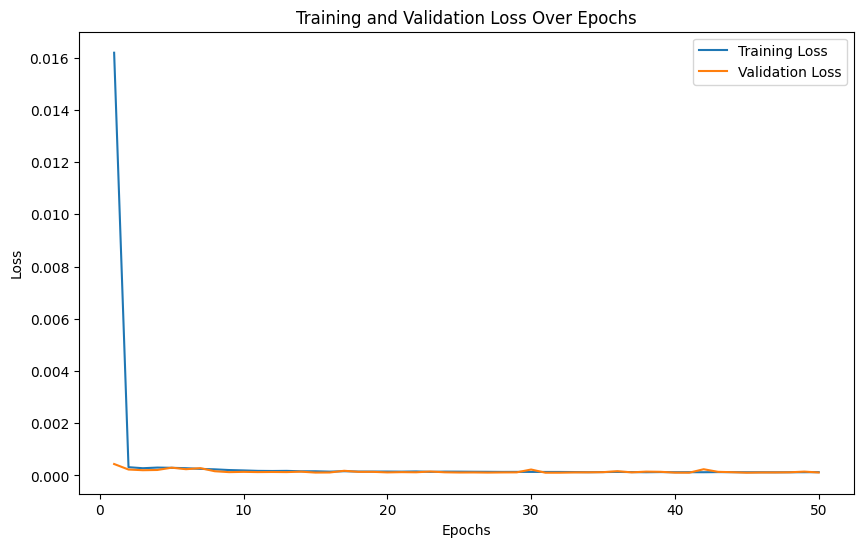

In [7]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = np.arange(1, len(train_loss) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
accuracy = 1 - loss
print(f"Accuracy: {accuracy}")

119/119 [==============================] - 0s 2ms/step - loss: 1.1798e-04
Test Loss: 0.00011798278865171596
Accuracy: 0.9998820172113483


In [9]:
predictions = model.predict(X_test)

r2 = r2_score(y_test, predictions)
print(f"R-squared (R2) Score: {r2}")

119/119 [==============================] - 0s 1ms/step
R-squared (R2) Score: 0.973610826322852


119/119 [==============================] - 0s 3ms/step


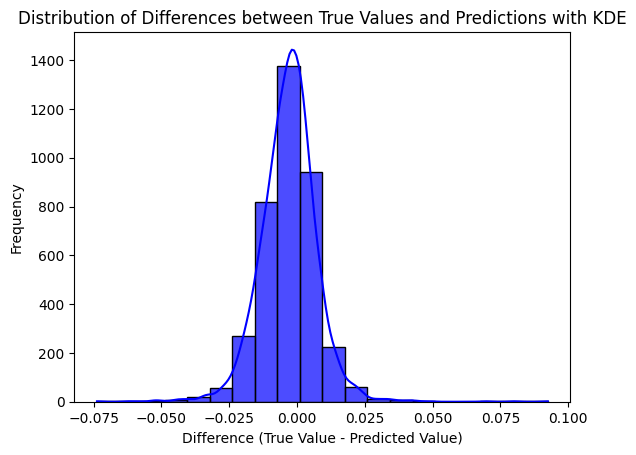

In [10]:
y_test_values = y_test.to_numpy().flatten()

predictions = model.predict(X_test).flatten()

differences = y_test_values - predictions

sns.histplot(differences, bins=20, kde=True, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Difference (True Value - Predicted Value)')
plt.ylabel('Frequency')
plt.title('Distribution of Differences between True Values and Predictions with KDE')
plt.show()

#### Plot actual values vs predictions

119/119 [==============================] - 0s 3ms/step


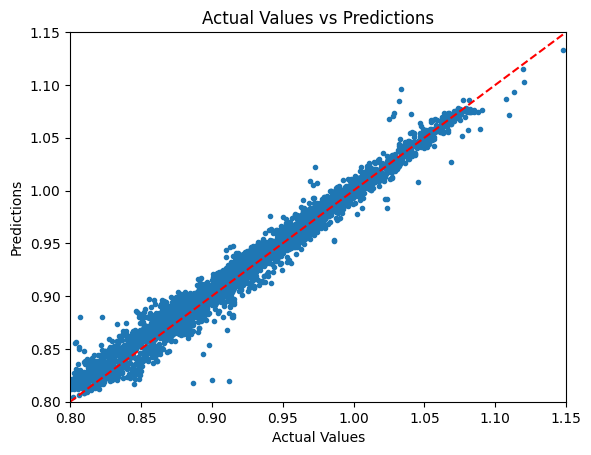

In [11]:

predictions = model.predict(X_test).flatten()
plt.scatter(y_test, predictions,marker='.')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Actual Values vs Predictions')

plt.xlim(0.8, 1.15)
plt.ylim(0.8, 1.15)

plt.plot([0,2], [0,2], color='red', linestyle='--', label='Slope 1 Line')

plt.show()

In [12]:
csv_file_path = 'prepered_data_for_neuralnetwoks_0.8_test.csv'

df = pd.read_csv(csv_file_path)

df.shape

(8440, 51)

In [13]:
X_test_ = df.iloc[:, :-1]
y_test_ = df.iloc[:, -1:]


In [14]:
# Evaluate the model on the test set
loss = model.evaluate(X_test_, y_test_)
print(f"Test Loss: {loss}")
accuracy = 1 - loss
print(f"Accuracy: {accuracy}")

264/264 [==============================] - 1s 2ms/step - loss: 1.0762e-04
Test Loss: 0.000107623178337235
Accuracy: 0.9998923768216628


In [15]:
predictions = model.predict(X_test_)

r2 = r2_score(y_test_, predictions)
print(f"R-squared (R2) Score: {r2}")

264/264 [==============================] - 0s 2ms/step
R-squared (R2) Score: 0.97369970642317


264/264 [==============================] - 1s 3ms/step


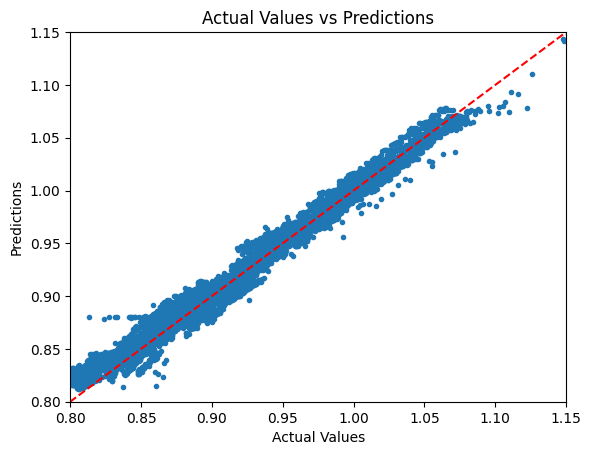

In [20]:
predictions = model.predict(X_test_).flatten()
plt.scatter(y_test_, predictions,marker='.')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Actual Values vs Predictions')

plt.xlim(0.8, 1.15)
plt.ylim(0.8, 1.15)

plt.plot([0,2], [0,2], color='red', linestyle='--', label='Slope 1 Line')

plt.show()